In [116]:
import pandas as pd
import numpy as np
from plotnine import *
import glob
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [129]:
categories = [
    {"name": "FTA", "path": "iat_dur_med/fta_websites.parquet"},
    {"name": "Web User", "path": "iat_dur_med/outage_report.parquet"},
    {"name": "Web Operator", "path": "iat_dur_med/websites_provider_reported.parquet"},
    {"name": "Online Games", "path": "iat_dur_med/online_games.parquet"},
    # {"name": "Cloud Jobs", "path": "iat_dur_med/goog19.parquet"},
]

# We only have a few datapoints, no need to boxplot
cloud_stuff = [
    {"name": "Cloud User", "path": "iat_dur_med/cloud_user_reports.parquet"},
    {"name": "Cloud Operator", "path": "iat_dur_med/cloud_provider_reports.parquet"},
]

In [134]:
def get_cloud_points(metric, quantile):
    all_iat_dfs = []
    for item in cloud_stuff:
        df = pd.read_parquet(item["path"])
        mask = (df["metric"] == metric) & (df["quantile"] == quantile)
        df_iat_meds = df[mask].reset_index(drop=True)
        df_iat_meds["name"] = item["name"]
        all_iat_dfs.append(df_iat_meds)
    iat_df = pd.concat(all_iat_dfs).reset_index(drop=True)
    iat_df["name"] = pd.Categorical(iat_df["name"], 
                    ["Cloud Operator", "Cloud User", "Online Games", "Web Operator", "Web User", "FTA"])
    return iat_df

cloud_iat_df = get_cloud_points("iat", "median")
cloud_iat_df

,metric,quantile,quantity,vendor_cat,name
0,iat,median,4500.0,aws,Cloud User
1,iat,median,6300.0,gcp,Cloud User
2,iat,median,5400.0,azure,Cloud User
3,iat,median,15746.0,GCP,Cloud Operator
4,iat,median,144540.0,AWS,Cloud Operator
5,iat,median,171000.0,Azure,Cloud Operator


In [135]:
def get_measure(metric, quantile):
    all_iat_dfs = []
    for item in categories:
        df = pd.read_parquet(item["path"])
        mask = (df["metric"] == metric) & (df["quantile"] == quantile)
        df_iat_meds = df[mask].reset_index(drop=True)
        df_iat_meds["name"] = item["name"]
        all_iat_dfs.append(df_iat_meds)
    iat_df = pd.concat(all_iat_dfs).reset_index(drop=True)
    iat_df["name"] = pd.Categorical(iat_df["name"], 
                    ["Cloud Operator", "Cloud User", "Online Games", "Web Operator", "Web User", "FTA"])
    return iat_df

iat_df = get_measure("iat", "median")
iat_df

,metric,quantile,quantity,site,name,vendor_cat
0,iat,median,1206.5,armedforces.nic.in,FTA,NaN
1,iat,median,1218.0,asia.cnn.com,FTA,NaN
2,iat,median,1200.0,canberra.yourguide.com.au,FTA,NaN
3,iat,median,2100.0,digital.library.upenn.edu,FTA,NaN
4,iat,median,1820.0,games.yahoo.com,FTA,NaN
...,...,...,...,...,...,...
155,iat,median,208680.0,NaN,Online Games,cubecraft
156,iat,median,220440.0,NaN,Online Games,hive
157,iat,median,164160.0,NaN,Online Games,hypixel
158,iat,median,12480.0,NaN,Online Games,minehut


In [120]:
def get_iat(series, colname):
    t1 = series.sort_values().reset_index(drop=True)
    t2 = np.roll(t1, -1)
    t2[-1] = 0
    iat = t2 - t1
    iat = iat[iat > 0]
    return iat
    grouped_iat = iat.reset_index().groupby(colname).count().reset_index().rename(columns={"index": "count"})
    grouped_iat["pdf"] = grouped_iat["count"] / grouped_iat["count"].sum()
    grouped_iat["cdf"] = grouped_iat["pdf"].cumsum()
    return grouped_iat

In [132]:
goog_df = pd.read_parquet("google2019a/fail_events_with_end.parquet")
goog_iat = get_iat(goog_df["start_time"], "start_time").reset_index()
goog_iat["index"] = "Google Jobs"
print(goog_iat["start_time"].quantile([0.5, 0.95]))
goog_df["duration"] = goog_df["end_time"] - goog_df["start_time"]
goog_df["index"] = "Google Jobs"
print(goog_df["duration"].quantile([0.5, 0.95]))

0.50       7.282083
0.95    1056.442824
Name: start_time, dtype: float64
0.50      3939.027427
0.95    409442.897605
Name: duration, dtype: float64


In [149]:
np.log10([10, 100])

array([1., 2.])

/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots_png/mtbf_median.png
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 10 rows containing non-finite values.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 10 rows containing non-finite values.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarnin

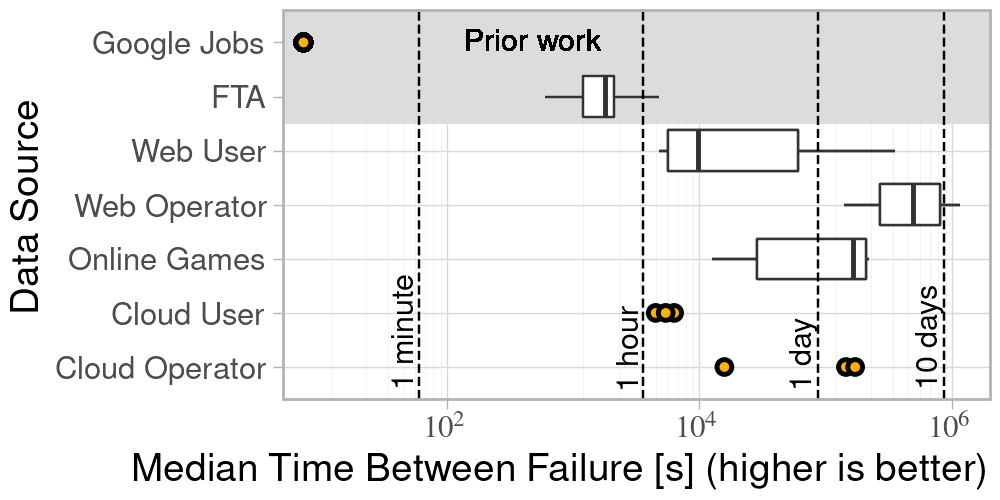

In [183]:
def exponential_labels(inp):
    exponent = np.log10(inp).astype(int)
    return [f"$10^{e}$" for e in exponent]

marker_df = pd.DataFrame({
    'sec': [60, 60*60, 60*60*24, 60*60*24*10],
    'y': [1.7, 1.4, 1.3, 1.6],
    'text': ['1 minute', '1 hour', '1 day', '10 days']
})

plt = (ggplot(iat_df)
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_rect(aes(xmin=5.5, xmax=7.6, ymin=0, ymax=2e6), fill="gainsboro")
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_point(aes(x="name", y="quantity"), shape="o", size=2, stroke=1, 
                 fill="#FFB200", data=cloud_iat_df)
    + geom_point(aes(x="index", y="7.3"), size=2, stroke=1, fill="#FFB200", data=goog_iat)
    + scale_y_log10(limits=[0.5e1, 2e6], expand=(0, 0), labels=exponential_labels)
    + geom_text(aes(x=7, y=500), label="Prior work")
    + coord_flip()
    + xlab("Data Source") + ylab("Median Time Between Failure [s] (higher is better) \hspace{1.5cm} t")
    + geom_hline(aes(yintercept='sec'), data=marker_df, linetype='--')
    + geom_text(aes(label="text", y="sec", x="y"), data=marker_df, angle=90, ha="right")
    + theme_light(base_size=14)
    + theme(figure_size=(5, 2.5))
      )

plt.save("plots_png/mtbf_median.png", dpi=300)
plt.save("plots_pdf/mtbf_median.pdf")
plt

In [141]:
cloud_dur_df = get_cloud_points("dur", "median")
cloud_dur_df
dur_df = get_measure("dur", "median")
dur_df

,metric,quantile,quantity,site,name,vendor_cat
0,dur,median,1207.0,armedforces.nic.in,FTA,NaN
1,dur,median,1219.0,asia.cnn.com,FTA,NaN
2,dur,median,1200.0,canberra.yourguide.com.au,FTA,NaN
3,dur,median,2400.0,digital.library.upenn.edu,FTA,NaN
4,dur,median,1820.0,games.yahoo.com,FTA,NaN
...,...,...,...,...,...,...
155,dur,median,1140.0,NaN,Online Games,cubecraft
156,dur,median,480.0,NaN,Online Games,hive
157,dur,median,960.0,NaN,Online Games,hypixel
158,dur,median,720.0,NaN,Online Games,minehut


/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots_png/mttr_median.png
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots_pdf/mttr_median.pdf
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10

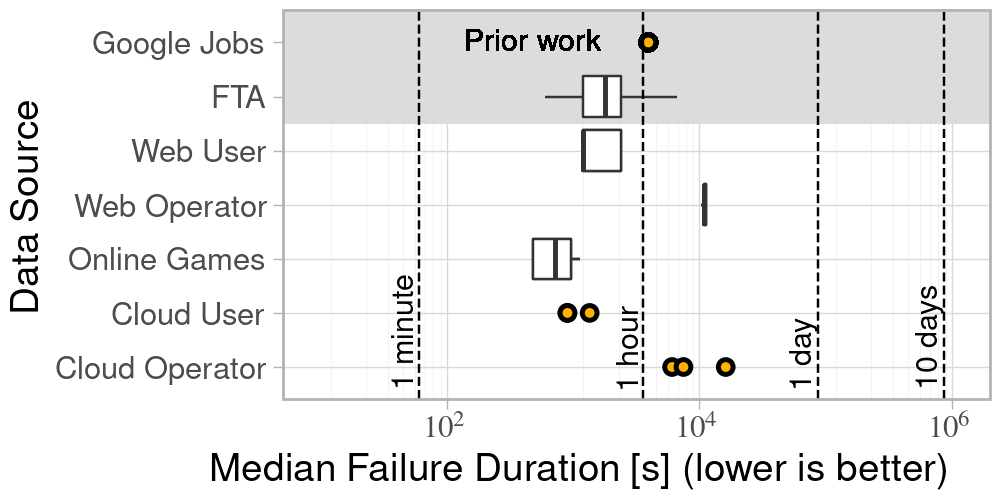

In [184]:
marker_df = pd.DataFrame({
    'sec': [60, 60*60, 60*60*24, 60*60*24*10],
    'y': [1.7, 1.4, 1.3, 1.6],
    'text': ['1 minute', '1 hour', '1 day', '10 days']
})

plt = (ggplot(dur_df)
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_rect(aes(xmin=5.5, xmax=7.6, ymin=0, ymax=2e6), fill="gainsboro")
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_point(aes(x="name", y="quantity"), shape="o", size=2, stroke=1, 
                 fill="#FFB200", data=cloud_dur_df)
    + geom_point(aes(x="index", y="3939"), size=2, stroke=1, fill="#FFB200", data=goog_df)
    + scale_y_log10(limits=[0.5e1, 2e6], expand=(0, 0), labels=exponential_labels)
    + geom_text(aes(x=7, y=500), label="Prior work")
    + coord_flip()
    + xlab("Data Source") + ylab("Median Failure Duration [s] (lower is better) \hspace{1cm} t")
    + geom_hline(aes(yintercept='sec'), data=marker_df, linetype='--')
    + geom_text(aes(label="text", y="sec", x="y"), data=marker_df, angle=90, ha="right")
    + theme_light(base_size=14)
    + theme(figure_size=(5, 2.5))
      )

plt.save("plots_png/mttr_median.png", dpi=300)
plt.save("plots_pdf/mttr_median.pdf")
plt

In [154]:
cloud_iat_tail_df = get_cloud_points("iat", "tail")
cloud_iat_tail_df
iat_tail_df = get_measure("iat", "tail")
iat_tail_df

,metric,quantile,quantity,site,name,vendor_cat
0,iat,tail,127213.25,armedforces.nic.in,FTA,NaN
1,iat,tail,652408.75,asia.cnn.com,FTA,NaN
2,iat,tail,20548.75,canberra.yourguide.com.au,FTA,NaN
3,iat,tail,970611.65,digital.library.upenn.edu,FTA,NaN
4,iat,tail,299730.00,games.yahoo.com,FTA,NaN
...,...,...,...,...,...,...
155,iat,tail,2090514.00,NaN,Online Games,cubecraft
156,iat,tail,1155672.00,NaN,Online Games,hive
157,iat,tail,1008600.00,NaN,Online Games,hypixel
158,iat,tail,570720.00,NaN,Online Games,minehut


/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots_png/mtbf_tail.png
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 6 rows containing non-finite values.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 6 rows containing non-finite values.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: F

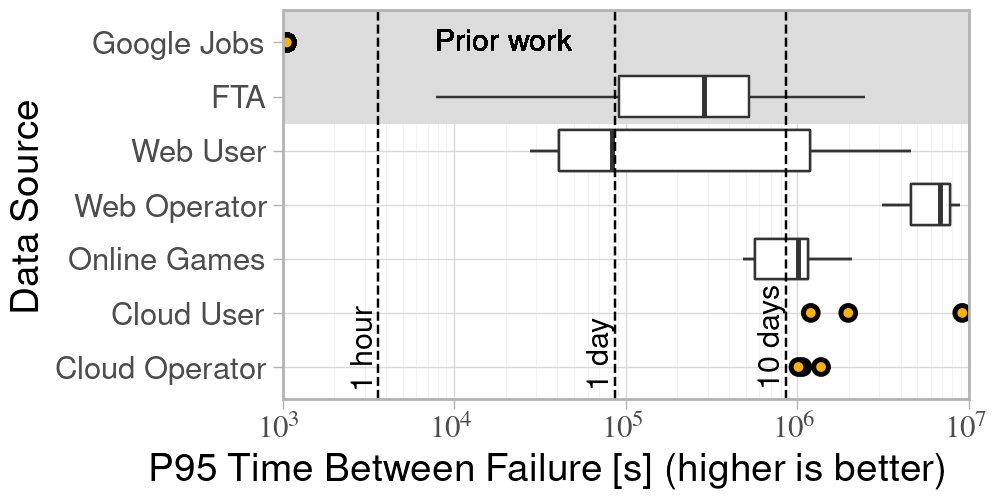

In [185]:
marker_df = pd.DataFrame({
    'sec': [60*60, 60*60*24, 60*60*24*10],
    'y': [1.4, 1.3, 1.6],
    'text': ['1 hour', '1 day', '10 days']
})

plt = (ggplot(iat_tail_df)
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_rect(aes(xmin=5.5, xmax=7.6, ymin=0, ymax=1e7), fill="gainsboro")
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_point(aes(x="name", y="quantity"), shape="o", size=2, stroke=1, 
                 fill="#FFB200", data=cloud_iat_tail_df)
    + geom_point(aes(x="index", y="1056"), size=2, stroke=1, fill="#FFB200", data=goog_iat)
    + scale_y_log10(limits=[1e3, 1e7], expand=(0, 0), labels=exponential_labels)
    + geom_text(aes(x=7, y=20000), label="Prior work")
    + coord_flip()
    + xlab("Data Source") + ylab("P95 Time Between Failure [s] (higher is better) \hspace{1.5cm} t")
    + geom_hline(aes(yintercept='sec'), data=marker_df, linetype='--')
    + geom_text(aes(label="text", y="sec", x="y"), data=marker_df, angle=90, ha="right")
    + theme_light(base_size=14)
    + theme(figure_size=(5, 2.5))
      )

plt.save("plots_png/mtbf_tail.png", dpi=300)
plt.save("plots_pdf/mtbf_tail.pdf")
plt

In [156]:
cloud_dur_tail_df = get_cloud_points("dur", "tail")
cloud_dur_tail_df
dur_tail_df = get_measure("dur", "tail")
dur_tail_df

,metric,quantile,quantity,site,name,vendor_cat
0,dur,tail,126852.5,armedforces.nic.in,FTA,NaN
1,dur,tail,657996.6,asia.cnn.com,FTA,NaN
2,dur,tail,20519.2,canberra.yourguide.com.au,FTA,NaN
3,dur,tail,958371.3,digital.library.upenn.edu,FTA,NaN
4,dur,tail,299190.0,games.yahoo.com,FTA,NaN
...,...,...,...,...,...,...
155,dur,tail,5112.0,NaN,Online Games,cubecraft
156,dur,tail,7032.0,NaN,Online Games,hive
157,dur,tail,3300.0,NaN,Online Games,hypixel
158,dur,tail,4512.0,NaN,Online Games,minehut


/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots_png/mttr_tail.png
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 2.5 in image.
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots_pdf/mttr_tail.pdf
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/home/stalluri/.miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


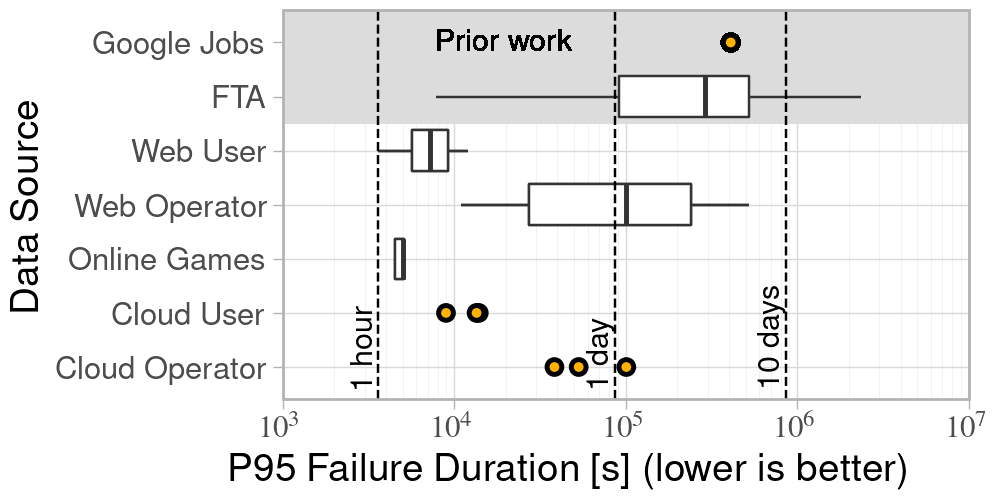

In [186]:
marker_df = pd.DataFrame({
    'sec': [60*60, 60*60*24, 60*60*24*10],
    'y': [1.4, 1.3, 1.6],
    'text': ['1 hour', '1 day', '10 days']
})

plt = (ggplot(dur_tail_df)
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_rect(aes(xmin=5.5, xmax=7.6, ymin=0, ymax=1e7), fill="gainsboro")
    + geom_boxplot(aes(x="name", y="quantity"), outlier_shape="")
    + geom_point(aes(x="name", y="quantity"), shape="o", size=2, stroke=1, 
                 fill="#FFB200", data=cloud_dur_tail_df)
    + geom_point(aes(x="index", y="409443"), size=2, stroke=1, fill="#FFB200", data=goog_df)
    + scale_y_log10(limits=[1e3, 1e7], expand=(0, 0), labels=exponential_labels)
    + geom_text(aes(x=7, y=20000), label="Prior work")
    + coord_flip()
    + xlab("Data Source") + ylab("P95 Failure Duration [s] (lower is better) \hspace{1cm} t")
    + geom_hline(aes(yintercept='sec'), data=marker_df, linetype='--')
    + geom_text(aes(label="text", y="sec", x="y"), data=marker_df, angle=90, ha="right")
    + theme_light(base_size=14)
    + theme(figure_size=(5, 2.5))
      )

plt.save("plots_png/mttr_tail.png", dpi=300)
plt.save("plots_pdf/mttr_tail.pdf")
plt